<a href="https://colab.research.google.com/github/weihanchen/google-colab-python-learn/blob/main/jupyter-examples/nlp/wordvector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【自然語言處理 - 概念篇】 來認識一下詞向量(Word Embedding or Word Vector)吧

詞跟詞之間的距離有多近呢？

如果一個詞在相對的空間內都佔有一席之地的話, 試想, 每個詞都是一個獨立的個體, 就如同我們人類一般, 相同興趣的、相同頻率的就容易被歸納在一起，某些詞可能是相近的意思, 因此我們只需要給每個詞標上一個向量值, 並進行統計，而這些詞在這批資料集之中所佔的位置依照距離都能夠歸納出相似的詞, 而有了這樣的關係之後, 我們就能夠進行語義搜索、情感分析、語言生成、文本分類...等, 原來一個簡單的「詞」可以延伸出這麼多的應用。

那「詞向量」主要就是將「詞」本身的資訊進行數值化, 而後續的NLP進階應用就可以透過這些資訊進行, 以下例子會從如何訓練詞向量逐步介紹到如何利用詞向量模型來找出相似的詞, 並以圖表化進行呈現。

## 安裝套件
- gensim: 文檔相似度計算和詞向量表示等自然語言處理(NLP)任務的Python庫。
- jieba: 將中文語句切成最小單位的詞。
- matplotlib: 繪製向量圖表。

In [ ]:
!pip install gensim

!pip install jieba

!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 定義中文語句並進行斷詞
這邊我們就設計個4句的範本進行後續的向量處理。

由於NLP世界中最小的單位是「詞」, 因此我們就要藉由jieba這套斷詞工具幫我們預先進行斷詞。

In [ ]:
import jieba
sentences = [
    list(jieba.cut('我喜歡吃蘋果')),
    list(jieba.cut('蘋果很好吃')),
    list(jieba.cut('水果是健康的')),
    list(jieba.cut('梨子也很好吃')),
    list(jieba.cut('我也喜歡吃柳丁')),
    list(jieba.cut('蘋果柳丁都是一種水果')),
    list(jieba.cut('蘋果是一種又香又甜的水果')),
    list(jieba.cut('梨子跟柳丁也是一種又香又甜的水果')),
]

sentences


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.829 seconds.
DEBUG:jieba:Loading model cost 0.829 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


[['我', '喜歡', '吃', '蘋果'],
 ['蘋果', '很', '好吃'],
 ['水果', '是', '健康', '的'],
 ['梨子', '也', '很', '好吃'],
 ['我', '也', '喜歡', '吃', '柳丁'],
 ['蘋果', '柳丁', '都', '是', '一種', '水果'],
 ['蘋果', '是', '一種', '又', '香', '又', '甜', '的', '水果'],
 ['梨子', '跟', '柳丁', '也', '是', '一種', '又', '香', '又', '甜', '的', '水果']]

## 訓練詞向量模型並取得詞向量

所謂的「詞向量」也稱為詞嵌入(Word embeddings), 當我們處理文本時，詞向量就是一種將詞語轉換為數字表示的方法。這些數字表示的向量具有特定的性質，能夠表示詞語之間的語義和關聯性。

總而言之，詞向量是一種將詞語轉換為數字向量表示的方法，能夠捕捉詞語之間的語義相似性，並在文本處理任務中發揮重要作用。

底下會得到一堆向量數值，嗯..., 看不懂, 怎麼辦？ 沒關係, 圖表是我們最大的幫手, 下一步我們就將這些向量值跟詞進行圖表的繪製吧！

In [ ]:
from gensim.models import Word2Vec

# 訓練詞向量模型
model = Word2Vec(sentences, window=5, min_count=1, workers=4)

# 獲取所有詞
vocab = model.wv.index_to_key

# 獲取所有詞向量
vectors = model.wv[vocab]

vectors

array([[-5.3630857e-04,  2.3646720e-04,  5.1041231e-03, ...,
        -7.0426278e-03,  9.0159255e-04,  6.3935029e-03],
       [-8.6233551e-03,  3.6638153e-03,  5.1871063e-03, ...,
        -2.3919728e-03, -9.5016956e-03,  4.5148465e-03],
       [ 8.8638728e-05,  3.0799997e-03, -6.8148547e-03, ...,
         5.1378825e-04,  8.2169194e-03, -7.0118154e-03],
       ...,
       [ 1.3001668e-03, -9.8043028e-03,  4.5877625e-03, ...,
        -2.5875687e-03, -7.7571664e-03,  4.1926014e-03],
       [ 1.8002307e-03,  7.0460914e-03,  2.9446983e-03, ...,
        -1.8595541e-03,  3.6117458e-03, -7.0364270e-03],
       [ 9.7315907e-03, -9.7780135e-03, -6.4999200e-03, ...,
        -2.7000697e-03,  3.8249956e-03,  3.3858197e-04]], dtype=float32)

## 下載中文字型讓圖表可以顯示中文

請參考「[🖋 【Google Colab Python系列】 視覺化資料Matplotlib 如何繪製出中文？](https://www.potatomedia.co/s/PDf86nk)」

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 下載繁體中文字型
!wget -O SourceHanSerifTW-VF.ttf https://github.com/adobe-fonts/source-han-serif/raw/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf

# 加入字型檔
fm.fontManager.addfont('SourceHanSerifTW-VF.ttf')

# 設定字型
# 
mpl.rc('font', family='Source Han Serif TW VF')

--2023-05-18 01:08:35--  https://github.com/adobe-fonts/source-han-serif/raw/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adobe-fonts/source-han-serif/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf [following]
--2023-05-18 01:08:36--  https://raw.githubusercontent.com/adobe-fonts/source-han-serif/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16883324 (16M) [application/octet-stream]
Saving to: ‘SourceHanSerifTW-VF.ttf’

SourceHanSerifTW-VF 100%[===================>]  16.10M  --.-KB/s

## 針對訓練完成的模型繪製二維向量圖

在前面我們已經展示了[word2vec](https://zh.wikipedia.org/zh-tw/Word2vec)的訓練方法, 訓練完畢之後我們應該要如何觀察這些詞向量分佈位置是不是我們所預期的, 但礙於高維度對我們人類來說難以理解，因此可以透過降維的方式繪製。

t-SNE(t-Distributed Stochastic Neighbor Embedding)是一種降維算法, 用於將高維數據映射到低維空間, 通常用於視覺化高維數據。

可以看到繪圖後的結果, 本應該相似的蘋果、梨子...等水果應該距離要相近的, 但我們的訓練樣本數實在太少了, 這樣的分佈狀況會有點失真， 這邊只是為了以圖來呈現我們的詞向量, 真正可用的模型是需要大量資料來進行訓練的, 以下我們也會使用已訓練完成的基礎模型來進行相似詞的搜尋。



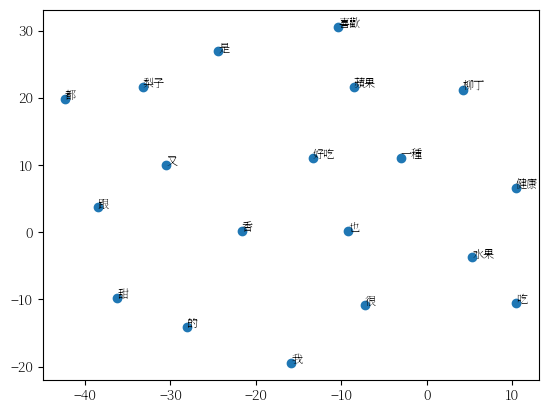

In [ ]:
import matplotlib.pyplot as plt


# 將詞向量降維為2D
from sklearn.manifold import TSNE
# 使用 t-SNE 進行詞向量降維
# perplexity 是用於控制降維後的分佈緊密度的參數。
tsne = TSNE(n_components=2, perplexity=10)
vectors_2d = tsne.fit_transform(vectors)

# 繪製散點圖
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

# 將詞語標籤添加到對應的點上
for i, word in enumerate(vocab):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=8)


# 顯示圖形
plt.show()

## 下載預訓練模型
上面我可以看到由於資料量不足, 導致訓練出來的模型沒有參考價值, 因此我們就使用別人訓練好的中文模型來進行接下來下的實驗吧。

這次使用的模型是fasttext的wiki.zh.vec, 如果有其他語言需求的朋友可以到這裡進行下載：

[https://fasttext.cc/docs/en/pretrained-vectors.html](https://fasttext.cc/docs/en/pretrained-vectors.html)



In [ ]:
import urllib.request

url = 'https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.zh.vec'

urllib.request.urlretrieve(url, './wiki.zh.vec')

('./wiki.zh.vec', <http.client.HTTPMessage at 0x7f048b602650>)

## 載入預訓練模型

載入模型之後, 我們可以對某個詞取出向量值。

In [ ]:
from gensim.models import KeyedVectors

# 載入中文詞向量模型
vector_file_path = './wiki.zh.vec'
wiki_model = KeyedVectors.load_word2vec_format(vector_file_path, binary=False)

# 使用詞向量模型進行相關操作
# 例如，取得詞向量
wiki_vec = wiki_model['詞']

wiki_vec

array([-0.06032 ,  1.0904  , -0.84849 ,  0.44816 ,  0.99418 , -0.54525 ,
       -0.4217  ,  0.17467 ,  0.27599 , -0.32351 ,  1.2191  ,  0.32721 ,
        1.3735  , -1.3133  ,  0.3486  , -0.97918 ,  0.73725 , -0.82807 ,
       -1.4202  , -0.74171 , -1.1526  ,  1.2093  ,  1.4909  ,  0.038005,
        0.7293  , -0.27754 ,  1.1821  ,  0.59781 ,  0.81285 ,  0.48405 ,
        0.82656 , -1.3401  , -1.1191  , -0.75164 , -0.91419 ,  1.4661  ,
        1.1855  , -0.773   ,  0.2971  ,  1.6708  ,  1.0814  ,  1.0091  ,
        1.3649  , -1.6616  , -0.25645 , -0.51539 , -0.8938  , -0.33579 ,
        0.72885 , -1.1739  ,  1.2954  , -0.43401 , -0.37647 , -0.38595 ,
       -0.21028 , -1.1768  , -1.2264  , -1.3622  , -5.1193  ,  0.77527 ,
        1.2076  , -0.30203 ,  0.96416 ,  1.6976  ,  0.87762 ,  1.2458  ,
       -0.86419 , -0.87513 , -0.743   , -0.2332  ,  1.5909  , -0.94396 ,
        1.3973  , -0.74587 , -0.94259 ,  0.42625 , -0.12898 , -1.2334  ,
       -0.68127 , -1.5117  , -0.1729  ,  0.24234 , 

## 找出「詞」的相似詞並以圖來分析
1. 找相似詞。
2. 降維度。
3. 縮放向量值: 1 ~ -1之間。
4. 設定門檻值為`1.0`, 並且將距離在`1.0以內`的相似詞連接起來。
5. 繪製圖表進行分析。

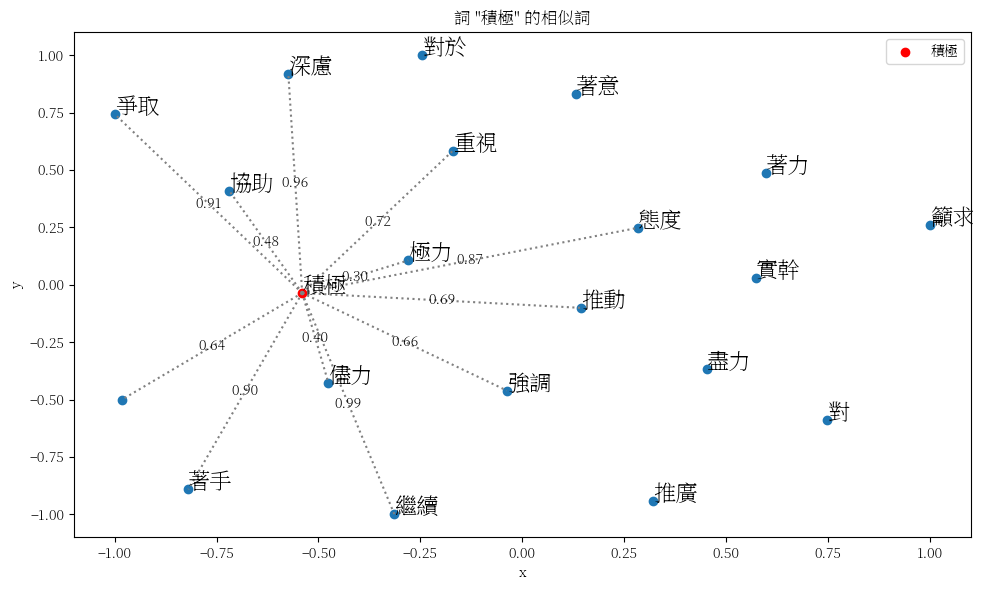

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

input_word = '積極'

# 輸入詞的相似詞及向量資訊
similar_words = wiki_model.most_similar(input_word, topn=20)
similar_words, scores = zip(*similar_words)
similar_vectors = [wiki_model[x] for x in similar_words]

# 將「輸入詞」與「相似詞」總和在一起, 統一進行以下的降維, 並將「輸入詞」擺放於第一位以利識別
words = [input_word] + list(similar_words)
input_vector = wiki_model[input_word]
vectors = np.vstack(([input_vector], similar_vectors))


# 使用 t-SNE 降維
tsne = TSNE(n_components=2, perplexity=10)
vectors_2d = tsne.fit_transform(vectors)

# 縮放向量值到範圍 [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
vectors_2d = scaler.fit_transform(vectors_2d)

# 繪製散點圖
plt.figure(figsize=(10, 6))

# 繪製輸入詞本身的點
plt.scatter(vectors_2d[0, 0], vectors_2d[0, 1], color='red', label=input_word)

# 將輸入詞標籤添加到對應的點上
plt.annotate(input_word, xy=(vectors_2d[0, 0], vectors_2d[0, 1]), fontsize=16)

# 繪製相似詞的點
plt.scatter(vectors_2d[1:, 0], vectors_2d[1:, 1])

# 將相似詞標籤添加到對應的點上
for i, x in enumerate(similar_words[1:]):
    plt.annotate(x, xy=(vectors_2d[i+1, 0], vectors_2d[i+1, 1]), fontsize=16)

threshold = 1.0
# 繪製連線
for i in range(1, len(vectors_2d)):
    distance = np.linalg.norm(vectors_2d[0, :] - vectors_2d[i, :])
    if distance <= threshold:
      plt.plot([vectors_2d[0, 0], vectors_2d[i, 0]], [vectors_2d[0, 1], vectors_2d[i, 1]], color='gray', linestyle='dotted')
      midpoint = (vectors_2d[0, :] + vectors_2d[i, :]) / 2
      plt.annotate(f'{distance:.2f}', xy=midpoint, ha='center', va='center')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'詞 "{input_word}" 的相似詞')
plt.legend()
plt.tight_layout()
plt.show()

## 結語
將向量透過圖表化的方式可以幫助我們更容易了解到NLP的基礎處理方式, 一步步拆解之後, 我們就不會對這種技術感到害怕了, 整個操作下來感覺科學家的智慧真的是令人讚嘆, 能夠將我們人類的語句想辦法讓機器可以理解甚至進行推理, 就以情緒分類來說, 訓練的過程中考慮了詞彙在上下文中的出現頻率和分佈情況, 並且在詞向量空間中可能會形成特定的集群或分布, 透過這樣的觀察就能夠推測出可能的情緒。